In [1]:
from actorcritic import ActorCriticAgent, EnvironmentWrapper, ContinuousActorCriticAgent
import gymnasium as gym
import datetime
import numpy as np

## Without freezing 

In [17]:
# hyperparameters
config = {
    'experiment': 'CartPole2MCC',
    'device': 'cuda',
    'state_size': 6, 
    'action_size': 3,
    'hidden_sizes': [64, 64], 
    'lr_actor': 0.001,
    'lr_critic': 0.0005,
    'verbosity': 10,
    'env_name': 'MountainCarContinuous-v0',
    'gamma': 0.99, 
    'reward_threshold': 80.0,
    'max_episodes': 2000,
    'max_steps': 500,
    'update_frequency': 2000,
    'discrete': True

}


In [18]:
# Initialize the ActorCriticAgent
agent = ActorCriticAgent(config)

In [19]:
# load previous model weights
agent.load_models(env_name='CartPole-v1')

In [21]:
class MCCWrapper(EnvironmentWrapper):
    def __init__(self, env, num_actions=2):
        super().__init__(env)
        self.action_space = num_actions
        # Define the discrete action boundaries
        self.action_boundaries = np.linspace(-1, 1, num_actions)
        self.ticker = 0


    def step(self, action):
        # Convert the discrete action into a continuous action
        continuous_action = [self.discretize_action(action)]


        # Step using the continuous action
        state, reward, done, _, info = self.env.step(continuous_action)

        if self.ticker < 500:
            reward = 0            
            if state[0] >= 0.45:
                reward += 100
        

        # Pad state to match target_state_size
        padded_state = np.append(state, np.zeros(self.target_state_size - len(state)))
        
        self.ticker += 1

        return padded_state, reward, done, info
    


    def discretize_action(self, action):
        # Ensure the action is within the valid range
        action = max(0, min(action, self.action_space - 1))
        return self.action_boundaries[action]

In [22]:
# Initialize the environment
env = gym.make(config['env_name'])

env_wrapper = MCCWrapper(env, num_actions=2)

In [23]:
results = agent.train(env_wrapper, max_episodes=config['max_episodes'], max_steps=config['max_steps'], reward_threshold=config['reward_threshold'], update_frequency=config['update_frequency'])

Episode 0, Avg Reward: 100.0, PLoss: -176.03294372558594, VLoss: 179.6963348388672
Episode 10, Avg Reward: -2.6636363636366784, PLoss: -347.7080993652344, VLoss: 433.1574401855469
Episode 20, Avg Reward: -3.809523809524149, PLoss: -499.9294738769531, VLoss: 570.659423828125
Episode 30, Avg Reward: -11.62903225806488, PLoss: -473.38214111328125, VLoss: 555.635498046875
Episode 40, Avg Reward: -6.5902439024393775, PLoss: -166.95118713378906, VLoss: 213.6312255859375
Episode 50, Avg Reward: -1.835294117647407, PLoss: -291.5284729003906, VLoss: 365.365966796875
Episode 60, Avg Reward: -0.9737704918036338, PLoss: -407.8578796386719, VLoss: 478.89447021484375
Episode 70, Avg Reward: -1.749295774648247, PLoss: -450.4147033691406, VLoss: 518.3145751953125
Episode 80, Avg Reward: 2.290123456789774, PLoss: -223.39183044433594, VLoss: 292.13409423828125
Episode 90, Avg Reward: 6.846153846153509, PLoss: -463.6004943847656, VLoss: 537.7360229492188
Episode 100, Avg Reward: 6.142999999999663, PLoss:

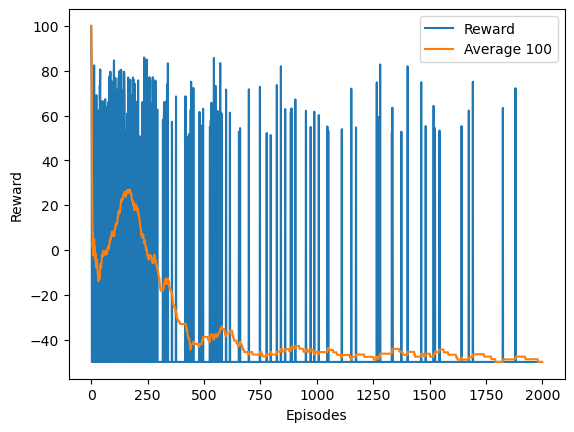

In [24]:
# plot results
import matplotlib.pyplot as plt

plt.plot(results['Episode'], results['Reward'], label='Reward')
plt.plot(results['Episode'], results['Average_100'], label='Average 100')
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.legend()
plt.show()


In [26]:
# save results with model name and time
np.save(f'results/{config["experiment"]}', results)

In [27]:
results['Duration']

1884.221069574356

## With freezing weights

In [6]:
# hyperparameters
config = {
    'experiment': 'CartPole2MCC_freeze',
    'device': 'cuda',
    'state_size': 6, 
    'action_size': 3,
    'hidden_sizes': [64, 64], 
    'lr_actor': 0.001,
    'lr_critic': 0.0005,
    'verbosity': 10,
    'env_name': 'MountainCarContinuous-v0',
    'gamma': 0.99, 
    'reward_threshold': 80.0,
    'max_episodes': 2000,
    'max_steps': 500,
    'update_frequency': 500,
    'discrete': True

}



In [7]:
# Initialize the ActorCriticAgent
agent = ActorCriticAgent(config)
# load previous model weights
agent.load_models(env_name='CartPole-v1')

In [8]:
agent.reinitialize_output_layers(2)

In [9]:

class MCCWrapper(EnvironmentWrapper):
    def __init__(self, env, num_actions=2):
        super().__init__(env)
        self.action_space = num_actions
        # Define the discrete action boundaries
        self.action_boundaries = np.linspace(-1, 1, num_actions)
        self.ticker = 0


    def step(self, action):
        # Convert the discrete action into a continuous action
        continuous_action = [self.discretize_action(action)]

        # Step using the continuous action
        state, reward, done, _, info = self.env.step(continuous_action)
        
        # Pad state to match target_state_size
        padded_state = np.append(state, np.zeros(self.target_state_size - len(state)))
        
        self.ticker += 1

        return padded_state, reward, done, info
    


    def discretize_action(self, action):
        # Ensure the action is within the valid range
        action = max(0, min(action, self.action_space - 1))
        return self.action_boundaries[action]
# Initialize the environment
env = gym.make(config['env_name'])

env_wrapper = MCCWrapper(env, num_actions=2)
results = agent.train(env_wrapper, max_episodes=config['max_episodes'], max_steps=config['max_steps'], reward_threshold=config['reward_threshold'], update_frequency=config['update_frequency'])
# plot results


Episode 0, Avg Reward: -50.00000000000044, PLoss: -14.87868881225586, VLoss: 0.9346953630447388
Episode 10, Avg Reward: -50.00000000000045, PLoss: -14.926925659179688, VLoss: 0.9320685267448425
Episode 20, Avg Reward: -50.00000000000044, PLoss: -14.959894180297852, VLoss: 0.9366559386253357
Episode 30, Avg Reward: -50.00000000000045, PLoss: -14.927695274353027, VLoss: 0.9406827092170715
Episode 40, Avg Reward: -50.00000000000044, PLoss: -14.966032981872559, VLoss: 0.9384877681732178
Episode 50, Avg Reward: -48.01568627451025, PLoss: -15.074908256530762, VLoss: 0.9463866949081421
Episode 60, Avg Reward: -48.34098360655783, PLoss: -14.973295211791992, VLoss: 0.940878689289093
Episode 70, Avg Reward: -48.574647887324396, PLoss: -14.852051734924316, VLoss: 0.9364345669746399
Episode 80, Avg Reward: -48.750617283951065, PLoss: -14.95530891418457, VLoss: 0.9416882991790771
Episode 90, Avg Reward: -47.72307692307734, PLoss: -14.964070320129395, VLoss: 0.9382060170173645
Episode 100, Avg Rewar

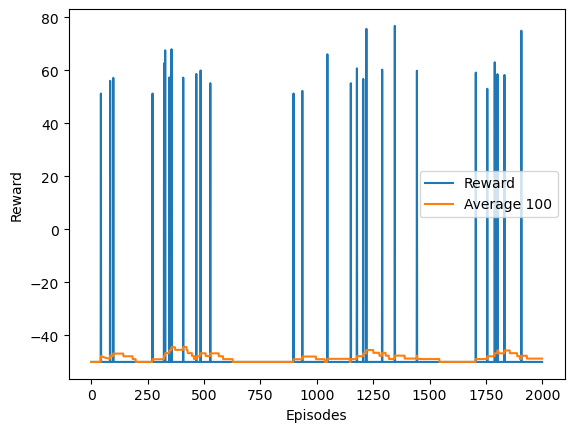

In [10]:
import matplotlib.pyplot as plt

plt.plot(results['Episode'], results['Reward'], label='Reward')
plt.plot(results['Episode'], results['Average_100'], label='Average 100')
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.legend()
plt.show()



In [11]:
# save results with model name and time
np.save(f'results/{config['experiment']}', results)

results['Duration']

SyntaxError: f-string: unmatched '[' (631580079.py, line 2)